In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
from tensorflow.python.client import device_lib
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]
print(get_available_devices()) 

import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


['/device:CPU:0', '/device:GPU:0']


# 0. Loading the data

### TinyImageNet does not have labels for the testing data. We will use the 10k validation images for the testing data.

In [2]:
from tensorflow.keras.utils import to_categorical  

#load cifar-10 dataset
(X_tot, y_tot), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
#one hot encoding
y_test=to_categorical(y_test, num_classes=10)
y_tot=to_categorical(y_tot, num_classes=10)

print(X_tot.shape)
print(y_tot.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [3]:
#shuffle data and split data to generate validation data
shuffler = np.random.RandomState(seed=42).permutation(len(X_tot))
X_tot = X_tot[shuffler]
y_tot = y_tot[shuffler]
 

#validation data
X_val=X_tot[0:2000]
y_val=y_tot[0:2000]

X_train=X_tot[2000:]
y_train=y_tot[2000:]

### training function

In [4]:
from utils.train_ratio import train_ratio

# Ratio=1

Model: "SE_custom_resnet46_ratio1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        input_6[0][0]                    
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[1][0]                 
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 16, 16, 64)   0           conv1_bn[1][0]                   
__________________________________________________________________________

Epoch 1/200
375/375 [==============================] - 29s 62ms/step - loss: 2.2095 - acc: 0.3004 - val_loss: 1.6751 - val_acc: 0.4225

Epoch 00001: val_acc improved from -inf to 0.42250, saving model to ./models/ratio/se_resnet_ratio_1.hdf5
Epoch 2/200
375/375 [==============================] - 22s 59ms/step - loss: 1.4412 - acc: 0.4882 - val_loss: 1.3926 - val_acc: 0.5080

Epoch 00002: val_acc improved from 0.42250 to 0.50800, saving model to ./models/ratio/se_resnet_ratio_1.hdf5
Epoch 3/200
375/375 [==============================] - 22s 58ms/step - loss: 1.2329 - acc: 0.5640 - val_loss: 1.1780 - val_acc: 0.5810

Epoch 00003: val_acc improved from 0.50800 to 0.58100, saving model to ./models/ratio/se_resnet_ratio_1.hdf5
Epoch 4/200
375/375 [==============================] - 22s 59ms/step - loss: 1.0916 - acc: 0.6135 - val_loss: 1.4363 - val_acc: 0.5015

Epoch 00004: val_acc did not improve from 0.58100
Epoch 5/200
375/375 [==============================] - 22s 60ms/step - loss: 0.999

375/375 [==============================] - 22s 58ms/step - loss: 0.1555 - acc: 0.9471 - val_loss: 0.5977 - val_acc: 0.8420

Epoch 00040: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00040: val_acc did not improve from 0.84200
Epoch 41/200
375/375 [==============================] - 22s 58ms/step - loss: 0.1468 - acc: 0.9482 - val_loss: 0.6127 - val_acc: 0.8380

Epoch 00041: val_acc did not improve from 0.84200
Epoch 42/200
375/375 [==============================] - 22s 58ms/step - loss: 0.1487 - acc: 0.9497 - val_loss: 0.6125 - val_acc: 0.8385

Epoch 00042: val_acc did not improve from 0.84200
Epoch 43/200
375/375 [==============================] - 22s 57ms/step - loss: 0.1513 - acc: 0.9505 - val_loss: 0.6167 - val_acc: 0.8345

Epoch 00043: val_acc did not improve from 0.84200
Epoch 44/200
375/375 [==============================] - 22s 58ms/step - loss: 0.1412 - acc: 0.9525 - val_loss: 0.6159 - val_acc: 0.8375

Epoch 00044: val_acc did not improve from 0.84200
Epoch 45/200


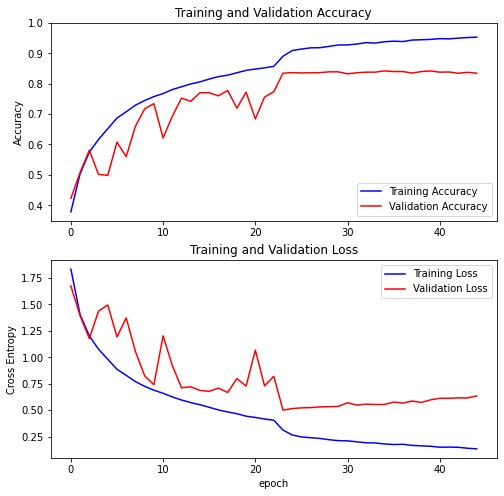

[0.37837499380111694, 0.5038958191871643, 0.574833333492279, 0.6166250109672546, 0.6519583463668823, 0.6869791746139526, 0.7075833082199097, 0.7293750047683716, 0.7446458339691162, 0.7575416564941406, 0.7677083611488342, 0.7807916402816772, 0.7898958325386047, 0.7991666793823242, 0.8060416579246521, 0.8152916431427002, 0.823312520980835, 0.8281041383743286, 0.835979163646698, 0.843874990940094, 0.8482083082199097, 0.8521666526794434, 0.8569999933242798, 0.89041668176651, 0.9090833067893982, 0.914020836353302, 0.9179375171661377, 0.9185208082199097, 0.9227499961853027, 0.9274374842643738, 0.9276250004768372, 0.9304166436195374, 0.9352083206176758, 0.9337708353996277, 0.9380208253860474, 0.9399583339691162, 0.9386875033378601, 0.9435833096504211, 0.9446666836738586, 0.9457708597183228, 0.948229193687439, 0.9475416541099548, 0.9498541951179504, 0.9519166946411133, 0.953125]
[1.833978533744812, 1.4034574031829834, 1.2025578022003174, 1.0769312381744385, 0.9815571904182434, 0.88701730966567

In [13]:
train_ratio(1,X_train,y_train,X_val,y_val,X_test, y_test)

# Ratio=2

Model: "SE_custom_resnet46_ratio1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        input_8[0][0]                    
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[1][0]                 
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 16, 16, 64)   0           conv1_bn[1][0]                   
__________________________________________________________________________

Epoch 1/200
375/375 [==============================] - 28s 61ms/step - loss: 2.2100 - acc: 0.2974 - val_loss: 1.5027 - val_acc: 0.4755

Epoch 00001: val_acc improved from -inf to 0.47550, saving model to ./models/ratio/se_resnet_ratio_2.hdf5
Epoch 2/200
375/375 [==============================] - 22s 57ms/step - loss: 1.4133 - acc: 0.4962 - val_loss: 1.2261 - val_acc: 0.5485

Epoch 00002: val_acc improved from 0.47550 to 0.54850, saving model to ./models/ratio/se_resnet_ratio_2.hdf5
Epoch 3/200
375/375 [==============================] - 21s 57ms/step - loss: 1.2277 - acc: 0.5653 - val_loss: 1.4559 - val_acc: 0.4820

Epoch 00003: val_acc did not improve from 0.54850
Epoch 4/200
375/375 [==============================] - 22s 57ms/step - loss: 1.0985 - acc: 0.6154 - val_loss: 1.7869 - val_acc: 0.4370

Epoch 00004: val_acc did not improve from 0.54850
Epoch 5/200
375/375 [==============================] - 21s 57ms/step - loss: 0.9675 - acc: 0.6593 - val_loss: 1.3698 - val_acc: 0.5390

Epoch

375/375 [==============================] - 21s 57ms/step - loss: 0.1348 - acc: 0.9541 - val_loss: 0.5790 - val_acc: 0.8435

Epoch 00040: val_acc did not improve from 0.84900
Epoch 41/200
375/375 [==============================] - 21s 57ms/step - loss: 0.1323 - acc: 0.9551 - val_loss: 0.5623 - val_acc: 0.8420

Epoch 00041: val_acc did not improve from 0.84900
Epoch 42/200
375/375 [==============================] - 22s 58ms/step - loss: 0.1286 - acc: 0.9558 - val_loss: 0.5776 - val_acc: 0.8405

Epoch 00042: val_acc did not improve from 0.84900
Epoch 43/200
375/375 [==============================] - 22s 57ms/step - loss: 0.1213 - acc: 0.9584 - val_loss: 0.5871 - val_acc: 0.8395

Epoch 00043: val_acc did not improve from 0.84900
Epoch 44/200
375/375 [==============================] - 22s 57ms/step - loss: 0.1182 - acc: 0.9601 - val_loss: 0.5952 - val_acc: 0.8425

Epoch 00044: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00044: val_acc did not improve from 0.84900


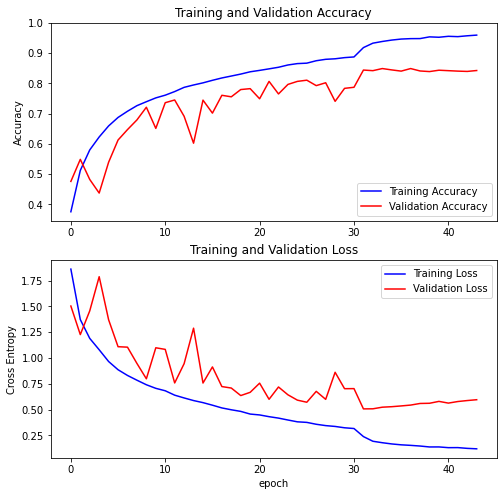

[0.375104159116745, 0.5118541717529297, 0.5796874761581421, 0.6225833296775818, 0.6591041684150696, 0.6871874928474426, 0.707687497138977, 0.726187527179718, 0.739270806312561, 0.7519166469573975, 0.760895848274231, 0.7728541493415833, 0.7867916822433472, 0.7946249842643738, 0.8016666769981384, 0.8100833296775818, 0.8178541660308838, 0.8242499828338623, 0.8307083249092102, 0.8382916450500488, 0.8429375290870667, 0.8480208516120911, 0.8532500267028809, 0.8608124852180481, 0.8653749823570251, 0.866854190826416, 0.874875009059906, 0.879562497138977, 0.8813124895095825, 0.8851458430290222, 0.8873958587646484, 0.9183333516120911, 0.932979166507721, 0.9385833144187927, 0.9432500004768372, 0.9466041922569275, 0.9479791522026062, 0.9481874704360962, 0.9538333415985107, 0.9525625109672546, 0.9557083249092102, 0.9545833468437195, 0.9574166536331177, 0.9596250057220459]
[1.8605027198791504, 1.3714888095855713, 1.1894179582595825, 1.0791544914245605, 0.9651453495025635, 0.8857026100158691, 0.83025

In [14]:
train_ratio(2,X_train,y_train,X_val,y_val,X_test, y_test)

# Ratio=4

Model: "SE_custom_resnet46_ratio1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        input_3[0][0]                    
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[1][0]                 
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 16, 16, 64)   0           conv1_bn[1][0]                   
__________________________________________________________________________

Epoch 1/200
375/375 [==============================] - 28s 60ms/step - loss: 2.2141 - acc: 0.2952 - val_loss: 1.6216 - val_acc: 0.4265

Epoch 00001: val_acc improved from -inf to 0.42650, saving model to ./models/ratio/se_resnet_ratio_4.hdf5
Epoch 2/200
375/375 [==============================] - 22s 58ms/step - loss: 1.4205 - acc: 0.4972 - val_loss: 1.2757 - val_acc: 0.5435

Epoch 00002: val_acc improved from 0.42650 to 0.54350, saving model to ./models/ratio/se_resnet_ratio_4.hdf5
Epoch 3/200
375/375 [==============================] - 22s 57ms/step - loss: 1.2231 - acc: 0.5655 - val_loss: 1.8728 - val_acc: 0.5425

Epoch 00003: val_acc did not improve from 0.54350
Epoch 4/200
375/375 [==============================] - 22s 57ms/step - loss: 1.1082 - acc: 0.6080 - val_loss: 1.0383 - val_acc: 0.6285

Epoch 00004: val_acc improved from 0.54350 to 0.62850, saving model to ./models/ratio/se_resnet_ratio_4.hdf5
Epoch 5/200
375/375 [==============================] - 22s 57ms/step - loss: 0.993

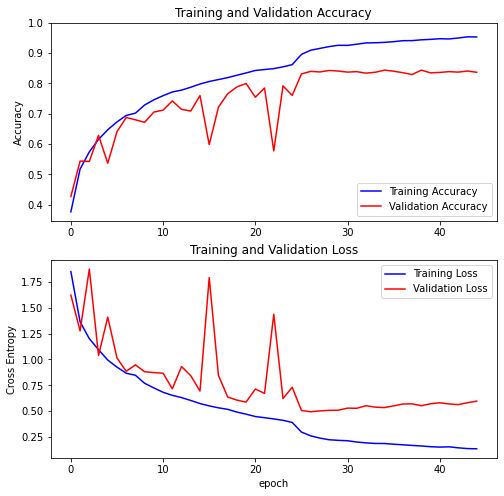

[0.37591665983200073, 0.5172500014305115, 0.5740208625793457, 0.6153333187103271, 0.6471250057220459, 0.6729791760444641, 0.6942499876022339, 0.7018541693687439, 0.7288958430290222, 0.7459791898727417, 0.7597083449363708, 0.7719166874885559, 0.7779791951179504, 0.7875624895095825, 0.7981666922569275, 0.8064583539962769, 0.8129166960716248, 0.8192708492279053, 0.8271458148956299, 0.8347083330154419, 0.8429375290870667, 0.8460000157356262, 0.8490416407585144, 0.8549374938011169, 0.8622083067893982, 0.8961041569709778, 0.9098749756813049, 0.9158333539962769, 0.921791672706604, 0.9260416626930237, 0.9257916808128357, 0.9297500252723694, 0.9339791536331177, 0.9344375133514404, 0.9357500076293945, 0.9380833506584167, 0.9413124918937683, 0.9415208101272583, 0.9441875219345093, 0.9456666707992554, 0.9477916955947876, 0.9470624923706055, 0.950124979019165, 0.9540208578109741, 0.9536874890327454]
[1.8484783172607422, 1.36343252658844, 1.200334906578064, 1.0938020944595337, 0.9934536218643188, 0.

In [6]:
train_ratio(4,X_train,y_train,X_val,y_val,X_test, y_test)

# Ratio=8

Model: "SE_custom_resnet46_ratio1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        input_12[0][0]                   
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[1][0]                 
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 16, 16, 64)   0           conv1_bn[1][0]                   
__________________________________________________________________________

Epoch 1/200
375/375 [==============================] - 29s 61ms/step - loss: 2.3382 - acc: 0.2891 - val_loss: 1.5171 - val_acc: 0.4515

Epoch 00001: val_acc improved from -inf to 0.45150, saving model to ./models/ratio/se_resnet_ratio_8.hdf5
Epoch 2/200
375/375 [==============================] - 22s 58ms/step - loss: 1.4644 - acc: 0.4745 - val_loss: 1.3077 - val_acc: 0.5395

Epoch 00002: val_acc improved from 0.45150 to 0.53950, saving model to ./models/ratio/se_resnet_ratio_8.hdf5
Epoch 3/200
375/375 [==============================] - 22s 57ms/step - loss: 1.2946 - acc: 0.5363 - val_loss: 1.2716 - val_acc: 0.5480

Epoch 00003: val_acc improved from 0.53950 to 0.54800, saving model to ./models/ratio/se_resnet_ratio_8.hdf5
Epoch 4/200
375/375 [==============================] - 21s 57ms/step - loss: 1.1423 - acc: 0.5928 - val_loss: 1.3663 - val_acc: 0.5300

Epoch 00004: val_acc did not improve from 0.54800
Epoch 5/200
375/375 [==============================] - 22s 58ms/step - loss: 1.046

375/375 [==============================] - 22s 58ms/step - loss: 0.1684 - acc: 0.9416 - val_loss: 0.7932 - val_acc: 0.8300

Epoch 00040: val_acc did not improve from 0.84300
Epoch 41/200
375/375 [==============================] - 22s 58ms/step - loss: 0.1569 - acc: 0.9466 - val_loss: 0.7883 - val_acc: 0.8335

Epoch 00041: val_acc did not improve from 0.84300
Epoch 42/200
375/375 [==============================] - 21s 57ms/step - loss: 0.1528 - acc: 0.9469 - val_loss: 0.9202 - val_acc: 0.8340

Epoch 00042: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00042: val_acc did not improve from 0.84300


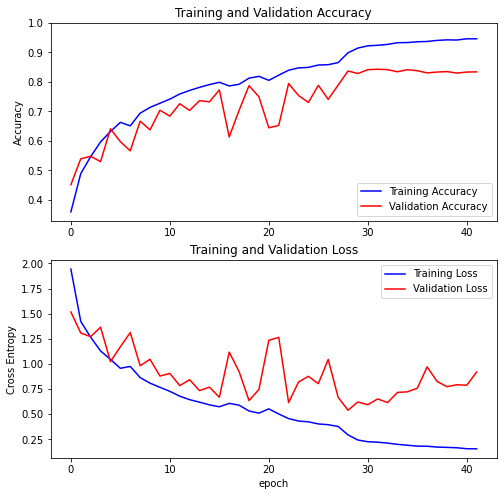

[0.359312504529953, 0.4892291724681854, 0.546708345413208, 0.596708357334137, 0.6317916512489319, 0.6628749966621399, 0.6510833501815796, 0.6940833330154419, 0.7136458158493042, 0.7277083396911621, 0.7417291402816772, 0.7591041922569275, 0.7711041569709778, 0.7816874980926514, 0.7910000085830688, 0.7988125085830688, 0.7863749861717224, 0.7919999957084656, 0.8128541707992554, 0.8188541531562805, 0.8053333163261414, 0.8228541612625122, 0.8396875262260437, 0.8475624918937683, 0.8492500185966492, 0.8572499752044678, 0.8584166765213013, 0.8654583096504211, 0.8987500071525574, 0.9148541688919067, 0.9223124980926514, 0.9241458177566528, 0.9271666407585144, 0.9329166412353516, 0.9334166646003723, 0.9360208511352539, 0.9371458292007446, 0.940708339214325, 0.9425833225250244, 0.9420833587646484, 0.9461666941642761, 0.9461666941642761]
[1.9436464309692383, 1.4232605695724487, 1.2661998271942139, 1.1295875310897827, 1.0458797216415405, 0.9568078517913818, 0.9754884243011475, 0.864480197429657, 0.8

In [16]:
train_ratio(8,X_train,y_train,X_val,y_val,X_test, y_test)

# Ratio=32

Model: "SE_custom_resnet46_ratio1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        input_1[0][0]                    
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[1][0]                 
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 16, 16, 64)   0           conv1_bn[1][0]                   
__________________________________________________________________________

Epoch 1/200
375/375 [==============================] - 48s 62ms/step - loss: 2.1425 - acc: 0.2990 - val_loss: 1.5695 - val_acc: 0.4275

Epoch 00001: val_acc improved from -inf to 0.42750, saving model to ./models/ratio/se_resnet_ratio_32.hdf5
Epoch 2/200
375/375 [==============================] - 22s 58ms/step - loss: 1.4205 - acc: 0.4991 - val_loss: 1.5972 - val_acc: 0.4340

Epoch 00002: val_acc improved from 0.42750 to 0.43400, saving model to ./models/ratio/se_resnet_ratio_32.hdf5
Epoch 3/200
375/375 [==============================] - 22s 58ms/step - loss: 1.1940 - acc: 0.5770 - val_loss: 1.7797 - val_acc: 0.4455

Epoch 00003: val_acc improved from 0.43400 to 0.44550, saving model to ./models/ratio/se_resnet_ratio_32.hdf5
Epoch 4/200
375/375 [==============================] - 22s 58ms/step - loss: 1.0874 - acc: 0.6146 - val_loss: 1.3740 - val_acc: 0.5455

Epoch 00004: val_acc improved from 0.44550 to 0.54550, saving model to ./models/ratio/se_resnet_ratio_32.hdf5
Epoch 5/200
375/375


Epoch 00038: val_acc did not improve from 0.84750
Epoch 39/200
375/375 [==============================] - 21s 57ms/step - loss: 0.1836 - acc: 0.9371 - val_loss: 0.5480 - val_acc: 0.8435

Epoch 00039: val_acc did not improve from 0.84750
Epoch 40/200
375/375 [==============================] - 21s 57ms/step - loss: 0.1777 - acc: 0.9383 - val_loss: 0.5308 - val_acc: 0.8505

Epoch 00040: val_acc improved from 0.84750 to 0.85050, saving model to ./models/ratio/se_resnet_ratio_32.hdf5
Epoch 41/200
375/375 [==============================] - 21s 57ms/step - loss: 0.1786 - acc: 0.9374 - val_loss: 0.5457 - val_acc: 0.8460

Epoch 00041: val_acc did not improve from 0.85050
Epoch 42/200
375/375 [==============================] - 21s 57ms/step - loss: 0.1698 - acc: 0.9412 - val_loss: 0.5488 - val_acc: 0.8470

Epoch 00042: val_acc did not improve from 0.85050
Epoch 43/200
375/375 [==============================] - 21s 57ms/step - loss: 0.1682 - acc: 0.9432 - val_loss: 0.5514 - val_acc: 0.8410

Epoc

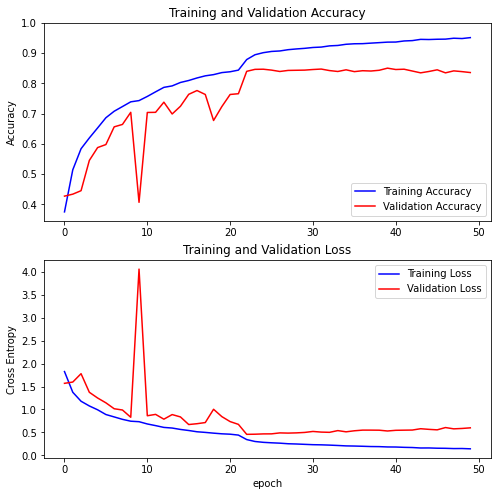

[0.37543749809265137, 0.5144166946411133, 0.5841458439826965, 0.6197708249092102, 0.6529374718666077, 0.6865833401679993, 0.7080833315849304, 0.7235833406448364, 0.739187479019165, 0.7432500123977661, 0.7570208311080933, 0.7722291946411133, 0.7869791388511658, 0.7918333411216736, 0.8031666874885559, 0.8097083568572998, 0.8180624842643738, 0.825083315372467, 0.8291041851043701, 0.835812509059906, 0.8385833501815796, 0.843999981880188, 0.8788958191871643, 0.8947708606719971, 0.901645839214325, 0.9057291746139526, 0.9073125123977661, 0.9115208387374878, 0.913979172706604, 0.9159791469573975, 0.918833315372467, 0.9201458096504211, 0.9241250157356262, 0.9254999756813049, 0.9294166564941406, 0.9310833215713501, 0.9314583539962769, 0.9332083463668823, 0.9348124861717224, 0.9365000128746033, 0.9367708563804626, 0.9403333067893982, 0.9415416717529297, 0.945645809173584, 0.9451249837875366, 0.9460208415985107, 0.9464166760444641, 0.9493958353996277, 0.9483749866485596, 0.9513750076293945]
[1.825

In [5]:
train_ratio(32,X_train,y_train,X_val,y_val,X_test, y_test)